In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from day16 import *

test = ValveSeq.readfile("test.txt")
for v in test.vlist:
    print(v)
print()

test.traverse("AA", debug=False)

Valve(name='AA', flowrate=0, tunnels=['DD', 'II', 'BB'])
Valve(name='BB', flowrate=13, tunnels=['CC', 'AA'])
Valve(name='CC', flowrate=2, tunnels=['DD', 'BB'])
Valve(name='DD', flowrate=20, tunnels=['CC', 'AA', 'EE'])
Valve(name='EE', flowrate=3, tunnels=['FF', 'DD'])
Valve(name='FF', flowrate=0, tunnels=['EE', 'GG'])
Valve(name='GG', flowrate=0, tunnels=['FF', 'HH'])
Valve(name='HH', flowrate=22, tunnels=['GG'])
Valve(name='II', flowrate=0, tunnels=['AA', 'JJ'])
Valve(name='JJ', flowrate=21, tunnels=['II'])


6387
1440


(1651,
 Step(valve='CC', minute=25, openvalves={'DD': 2, 'BB': 5, 'JJ': 9, 'HH': 17, 'EE': 21, 'CC': 24}, totalpressure=1651))

In [14]:
inp = ValveSeq.readfile("input.txt")
inp.traverse("AA")

12345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234
1340567
492078


(2080,
 Step(valve='ZO', minute=22, openvalves={'EI': 4, 'OA': 7, 'EK': 11, 'YP': 14, 'PU': 18, 'ZO': 21}, totalpressure=2080))

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
G = nx.DiGraph()
for v in test.vlist:
    G.add_node(v.name)
for v in test.vlist:
    for nv in v.tunnels:
        G.add_edge(v.name, nv)

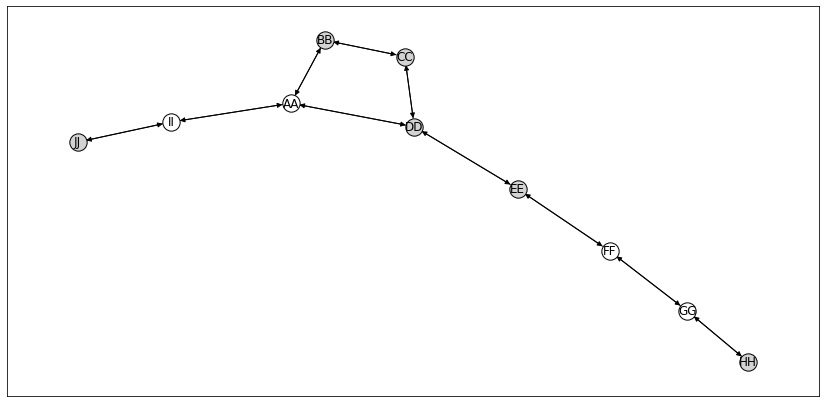

In [78]:
def drawgraph(valves):
    G = nx.DiGraph()
    for v in valves.vlist:
        G.add_node(v.name)
    for v in valves.vlist:
        for nv in v.tunnels:
            G.add_edge(v.name, nv)
    
    fig, ax = plt.subplots(figsize=(12,6))
    plt.tight_layout()
    pos = nx.spring_layout(G)
    options = {"edgecolors": "black"}
    nx.draw_networkx_nodes(G, pos, 
                       nodelist=[v.name for v in filter(lambda x: x.flowrate > 0, valves.vlist)],
                       node_color="lightgray",
                       **options)
    nx.draw_networkx_nodes(G, pos, 
                       nodelist=[v.name for v in filter(lambda x: x.flowrate == 0, valves.vlist)],
                       node_color="white",
                       **options)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.show()

drawgraph(test)

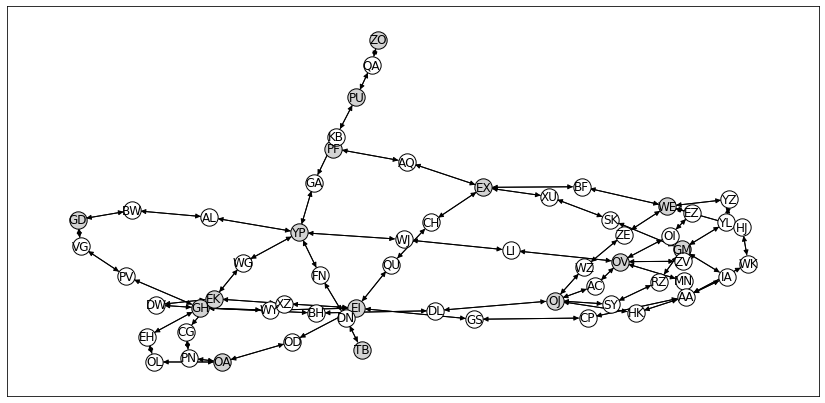

In [80]:
drawgraph(inp)

In [87]:
def floydwarshall(valves):
    dist = {}
    vnames = [v.name for v in valves]
    for v in valves:
        a = v.name
        for b in vnames:
            if a == b:
                dist[(a,b)] = 0
            elif b in v.tunnels:
                dist[(a,b)] = 1
            else:
                dist[(a,b)] = 1000  # "Inf"
    for k in vnames:
        for i in vnames:
            for j in vnames:
                if dist[(i,j)] > dist[(i,k)] + dist[(k,j)]:
                    dist[(i,j)] = dist[(i,k)] + dist[(k,j)]
    return dist

dist = floydwarshall(test.vlist)
goodvalves = [v.name for v in filter(lambda x: x.flowrate > 0, test.vlist)]
for a in goodvalves:
    for b in goodvalves:
        print(a, b, dist[(a,b)])

BB BB 0
BB CC 1
BB DD 2
BB EE 3
BB HH 6
BB JJ 3
CC BB 1
CC CC 0
CC DD 1
CC EE 2
CC HH 5
CC JJ 4
DD BB 2
DD CC 1
DD DD 0
DD EE 1
DD HH 4
DD JJ 3
EE BB 3
EE CC 2
EE DD 1
EE EE 0
EE HH 3
EE JJ 4
HH BB 6
HH CC 5
HH DD 4
HH EE 3
HH HH 0
HH JJ 7
JJ BB 3
JJ CC 4
JJ DD 3
JJ EE 4
JJ HH 7
JJ JJ 0
